# **任务描述：**

构建一个模型，根据鸢尾花的花萼和花瓣大小将其分为三种不同的品种。

![](https://ai-studio-static-online.cdn.bcebos.com/dd74666475b549fcae99ac2aff67488f015cdd76569d4d208909983bcf40fe3c)


# **数据集**
总共包含150行数据

每一行数据由 4 个特征值及一个目标值组成。

4 个特征值分别为：萼片长度、萼片宽度、花瓣长度、花瓣宽度

目标值为三种不同类别的鸢尾花，分别为：	Iris Setosa、Iris Versicolour、Iris Virginica

![](https://ai-studio-static-online.cdn.bcebos.com/8bdc417331ef45d5a380d2769f3a8bcd7b361212b20d4e78b2a32ee9c7a7b1fa)


**首先导入必要的包：**

**numpy**：python第三方库，用于科学计算

**matplotlib**:python第三方库，主要用于进行可视化

**sklearn**:python的重要机器学习库，其中封装了大量的机器学习算法，如：分类、回归、降维以及聚类

In [2]:
import numpy as np                
from matplotlib import colors     
from sklearn import svm            
from sklearn.svm import SVC
from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
#若提示缺少matplotlib等相关包，则可使用以下命令pip安装matplotlib等包
!pip install matplotlib

# **Step1.数据准备**

(1)从指定路径下加载数据

(2)对加载的数据进行数据分割，x_train,y_train,x_test,y_test分别表示训练集特征、训练集标签、测试集特征、测试集标签

In [4]:
#*************将字符串转为整型，便于数据加载***********************
def iris_type(s):
    it = {b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2}
    return it[s]

In [15]:
#加载数据
data_path='/Users/juanitahowe/Documents/GitHub/BNU_intro_AI/(2023_10_12)作业五_机器学习/iris.data'          #数据文件的路径
data = np.loadtxt(data_path,                                #数据文件路径
                  dtype=float,                              #数据类型
                  delimiter=',',                            #数据分隔符
                  converters={4:iris_type})                 #将第5列使用函数iris_type进行转换
#print(data)                                                #data为二维数组，data.shape=(150, 5)
#print(data.shape)
#数据分割
x, y = np.split(data,                                       #要切分的数组
                (4,),                                       #沿轴切分的位置，第5列开始往后为y
                axis=1)                                     #代表纵向分割，按列分割
x = x[:, 0:2]                                               #在这里X中我们取前两列作为特征，可不断调整使用的特征数，以到达更好的精确度
print(x)
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,              #所要划分的样本特征集
                                                               y,              #所要划分的样本结果
                                                               random_state=1, #随机数种子
                                                               test_size=0.3)  #测试样本占比

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

# **Step2.模型搭建**

C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。
C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。

kernel='linear'时，为线性核

decision_function_shape='ovr'时，为one v rest，即一个类别与其他类别进行划分，

decision_function_shape='ovo'时，为one v one，即将类别两两之间进行划分，用二分类的方法模拟多分类的结果。

In [6]:
#**********************SVM分类器构建*************************
def classifier():
    #clf = svm.SVC(C=0.8,kernel='rbf', gamma=50,decision_function_shape='ovr')
    clf = svm.SVC(C=0.5,                         #误差项惩罚系数,默认值是1
                  kernel='linear',               #线性核 kenrel="rbf":高斯核
                  decision_function_shape='ovr') #决策函数
    return clf

In [7]:
# 2.定义模型：SVM模型定义
clf = classifier()

# **Step3.模型训练**

In [8]:
#***********************训练模型*****************************
def train(clf,x_train,y_train):
    clf.fit(x_train,         #训练集特征向量
            y_train.ravel()) #训练集目标值

In [9]:
# 3.训练SVM模型
train(clf,x_train,y_train)

# **Step4.模型评估**

In [10]:
#**************并判断a b是否相等，计算acc的均值*************
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s Accuracy:%.3f' %(tip, np.mean(acc)))

In [11]:
def print_accuracy(clf,x_train,y_train,x_test,y_test):
    #分别打印训练集和测试集的准确率  score(x_train,y_train):表示输出x_train,y_train在模型上的准确率
    print('trianing prediction:%.3f' %(clf.score(x_train, y_train)))
    print('test data prediction:%.3f' %(clf.score(x_test, y_test)))
    #原始结果与预测结果进行对比   predict()表示对x_train样本进行预测，返回样本类别
    show_accuracy(clf.predict(x_train), y_train, 'traing data')
    show_accuracy(clf.predict(x_test), y_test, 'testing data')
    #计算决策函数的值，表示x到各分割平面的距离
    print('decision_function:\n', clf.decision_function(x_train))

In [12]:
# 4.模型评估
print_accuracy(clf,x_train,y_train,x_test,y_test)

trianing prediction:0.819
test data prediction:0.778
traing data Accuracy:0.819
testing data Accuracy:0.778
decision_function:
 [[-0.30200388  1.26702365  2.28292526]
 [ 2.1831931  -0.19913458  1.06956422]
 [ 2.25424706  0.79489006 -0.20587224]
 [ 2.22927055  0.98556708 -0.22777916]
 [ 0.95815482  2.18401419 -0.17375192]
 [ 2.23120771  0.84075865 -0.19144453]
 [ 2.17327158 -0.14884286  0.92795057]
 [-0.28667175  1.11372202  2.28302495]
 [-0.27989264  1.21274017  2.25881762]
 [-0.29313813  1.24442795  2.2732035 ]
 [-0.27008816  1.2272086   2.22682127]
 [-0.25981661  2.21998499  1.20479842]
 [-0.17071168  0.99542159  2.17180911]
 [-0.30018876  1.25829325  2.2829419 ]
 [-0.17539342  2.15368837  1.06772814]
 [ 2.25702986  0.81715893 -0.22763295]
 [-0.23988847  2.23286001  1.06656755]
 [-0.26915223  2.23333222  1.21679709]
 [ 2.22927055  0.98556708 -0.22777916]
 [ 2.2530903   0.85932358 -0.2359772 ]
 [-0.26740532  1.20784059  2.23528903]
 [ 2.26803658  0.80468578 -0.24299359]
 [-0.24030826 

# **Step5.模型使用**

In [13]:
def draw(clf, x):
    iris_feature = 'sepal length', 'sepal width', 'petal lenght', 'petal width'
    # 开始画图
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()               #第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()               #第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]   #生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)            #stack():沿着新的轴加入一系列数组
    print('grid_test:\n', grid_test)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    print('the distance to decision plane:\n', z)
    
    grid_hat = clf.predict(grid_test)                           # 预测分类值 得到【0,0.。。。2,2,2】
    print('grid_hat:\n', grid_hat)  
    grid_hat = grid_hat.reshape(x1.shape)                       # reshape grid_hat和x1形状一致
                                                                #若3*3矩阵e，则e.shape()为3*3,表示3行3列   
 
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
 
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)                                   # pcolormesh(x,y,z,cmap)这里参数代入
                                                                                      # x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolor='k', s=50, cmap=cm_dark) # 样本点
    plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolor='none', zorder=10)       # 测试点
    plt.xlabel(iris_feature[0], fontsize=20)
    plt.ylabel(iris_feature[1], fontsize=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('svm in iris data classification', fontsize=30)
    plt.grid()
    plt.show()

grid_test:
 [[4.3       2.       ]
 [4.3       2.0120603]
 [4.3       2.0241206]
 ...
 [7.9       4.3758794]
 [7.9       4.3879397]
 [7.9       4.4      ]]
the distance to decision plane:
 [[ 2.17689921  1.23467171 -0.25941323]
 [ 2.17943684  1.23363096 -0.25941107]
 [ 2.18189345  1.23256802 -0.25940892]
 ...
 [-0.27958977  0.83621535  2.28683228]
 [-0.27928358  0.8332275   2.28683314]
 [-0.27897389  0.83034313  2.28683399]]
grid_hat:
 [0. 0. 0. ... 2. 2. 2.]


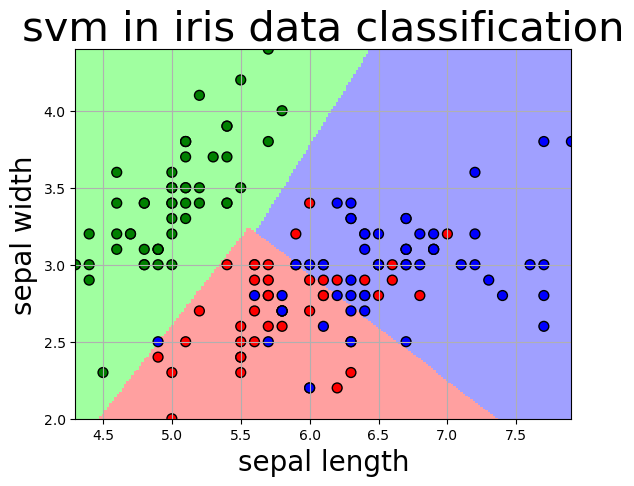

In [14]:
# 5.模型使用
draw(clf,x)